# Opdracht ML Les 1

In [87]:
# Import nodige modules
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.tree import DecisionTreeClassifier
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import tree
from sklearn.tree import export_graphviz

## Probleem

Er moet via machine learning voorspeld worden of de auto van acceptabele klasse is om te verkopen. Dit wordt aan de hand
gedaan van verschillende waardes die hieronder gezien kan worden.

-   buying       v-high, high, med, low
-   maint        v-high, high, med, low
-   doors        2, 3, 4, 5-more
-  persons      2, 4, more
-   lug_boot     small, med, big
-   safety       low, med, high

De waarden spreken voor zich.

De klasse van de auto wordt gemeten door deze waarden:
- unacc
- acc
- good
- v-good

Waar Unacc het slechtst is en v-good het beste is.

## Ophalen data
Voor het ophalen van de data moeten we ook de namen van de columns hebben sinds die niet gegeven zijn in het data
bestand. Hiervoor gebruiken we de namen van de features die gegeven zijn in het aparte bestand wat geleverd is.

In [88]:
# ophalen van de data via csv
data = pd.read_csv("car.data", names=["buying","maint","doors","persons","lug_boot", "safety", "class"])
print(data.shape)

(1728, 7)


In [89]:
# Laat eerste 5 waarden van de data zien
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


##  Visualize the data

<ipython-input-90-d5a0cf6ccba0>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot((length/2),3,j+1)


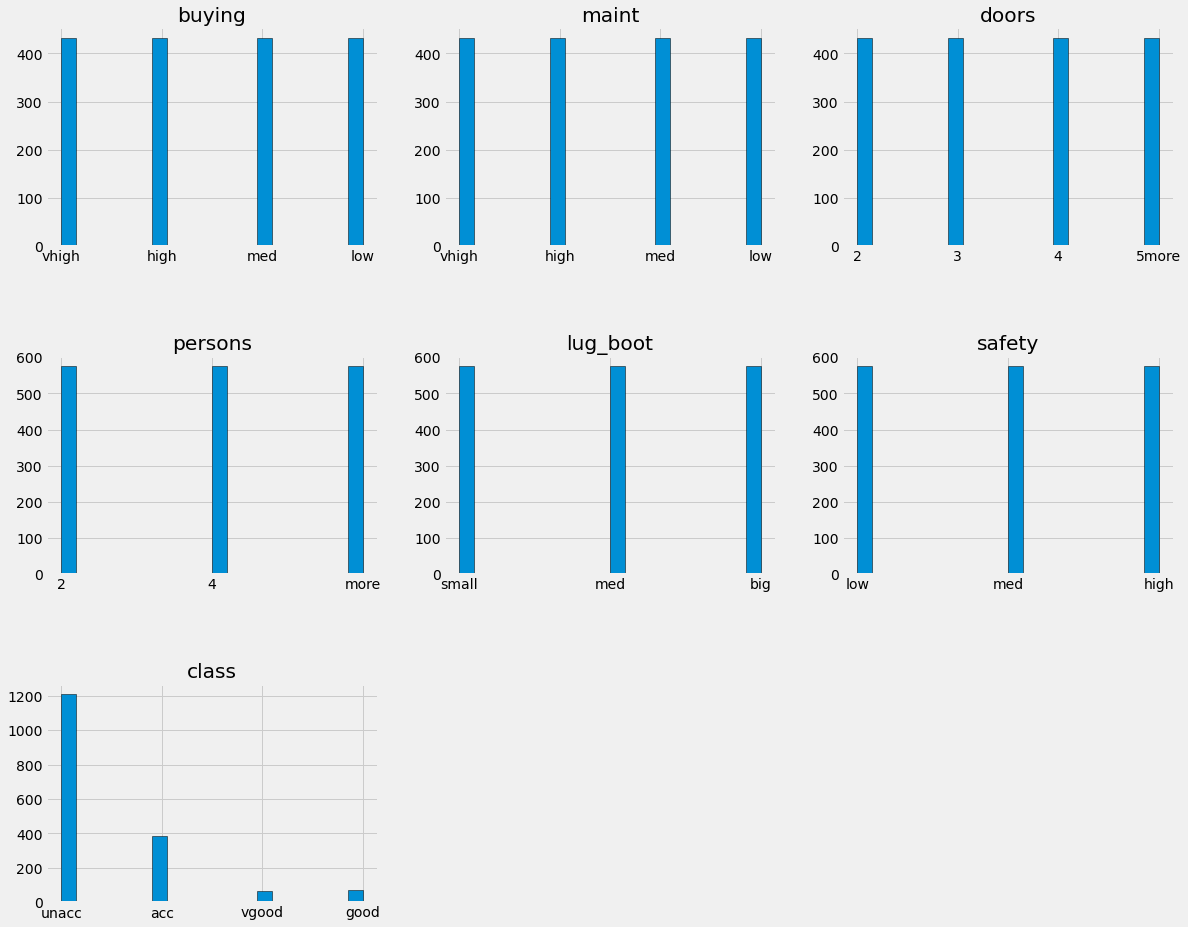

In [90]:
# Deze groep code loopt door de columns van een dataset en maakt grafieken.
columns=data.columns[:7]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

Hierboven is nog niet veel te zien van de verschillende waardes. Wel dat veel verschillende waardes in balans zijn
met hoeveelheid. Dit helpt mee voor het trainen van de dataset omdat het niet allemaal een specifieke waarde is. Dus
voor nu hoeft er niks gedaan te worden



#### Check op null waardes

In [91]:
data.isnull().values.any()

False

Geen null waardes gevonden. En uit de data hierboven ziet de dataset er schoon uit.

## Clean and prepare the data

Voor het schoonmaken is alleen een OrdinalEncoder nodig. De reden hiervoor is omdat nu namen worden gebruikt voor alle
waardes. Met een ordinal encoder kan je categorieën die op naam zijn veranderen naar een nummer. Dit kan een machine
learning model goed onderscheiden ipv. tekst.

In [92]:
# encode_labels(data)
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class'])
data = encoder.fit_transform(data)

data.head()

D:\anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


#### Correlation matrix

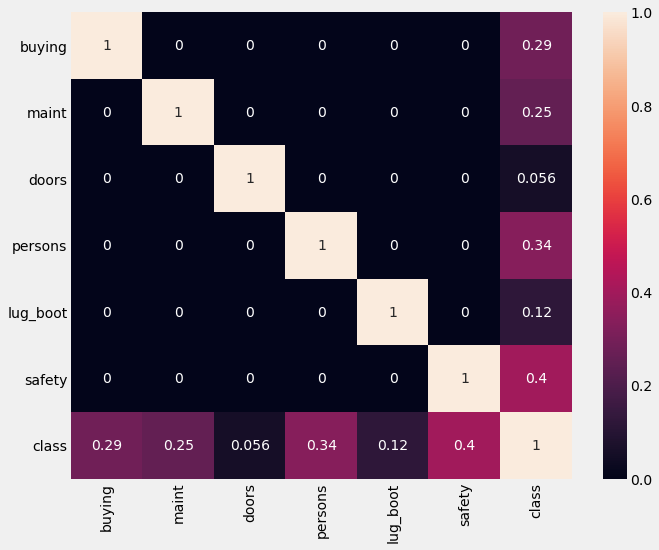

In [93]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



Zoals te zien hier in de correlatie matrix, heeft elke collumn een positieve correlatie op de class methode.
Sommige waarden heel laag, zoals doors en lug_boot. Dus als het model prestatie prblemen heeft kan hier naar gekeken
worden of de waardes misschien uit de modellen gehaald moeten worden. Voor nu houden we alle waarden in de matrix.

#### Prepare data

In [94]:
y_data = data["class"]
x_data = data.drop(columns={"class"})

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, train_size=0.8, random_state=3)

### Model keuze
De modellen die gebruikt worden is Random Forest en een DecisionTree. De reden dat ik hiervoor gekozen heb is omdat het
goede modellen zijn

In [96]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

print(rfc.score(X_test, y_test))

0.976878612716763


In [101]:
kfold = KFold(n_splits=5, shuffle=True, random_state=3)
dtc = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(dtc,x_data,y_data,cv=kfold, n_jobs=-1)
print(scores.mean())

0.9809047499371701


### Results
Hieronder zie je 1 estimator van de random forest en de hele DecisionTreeClassifier

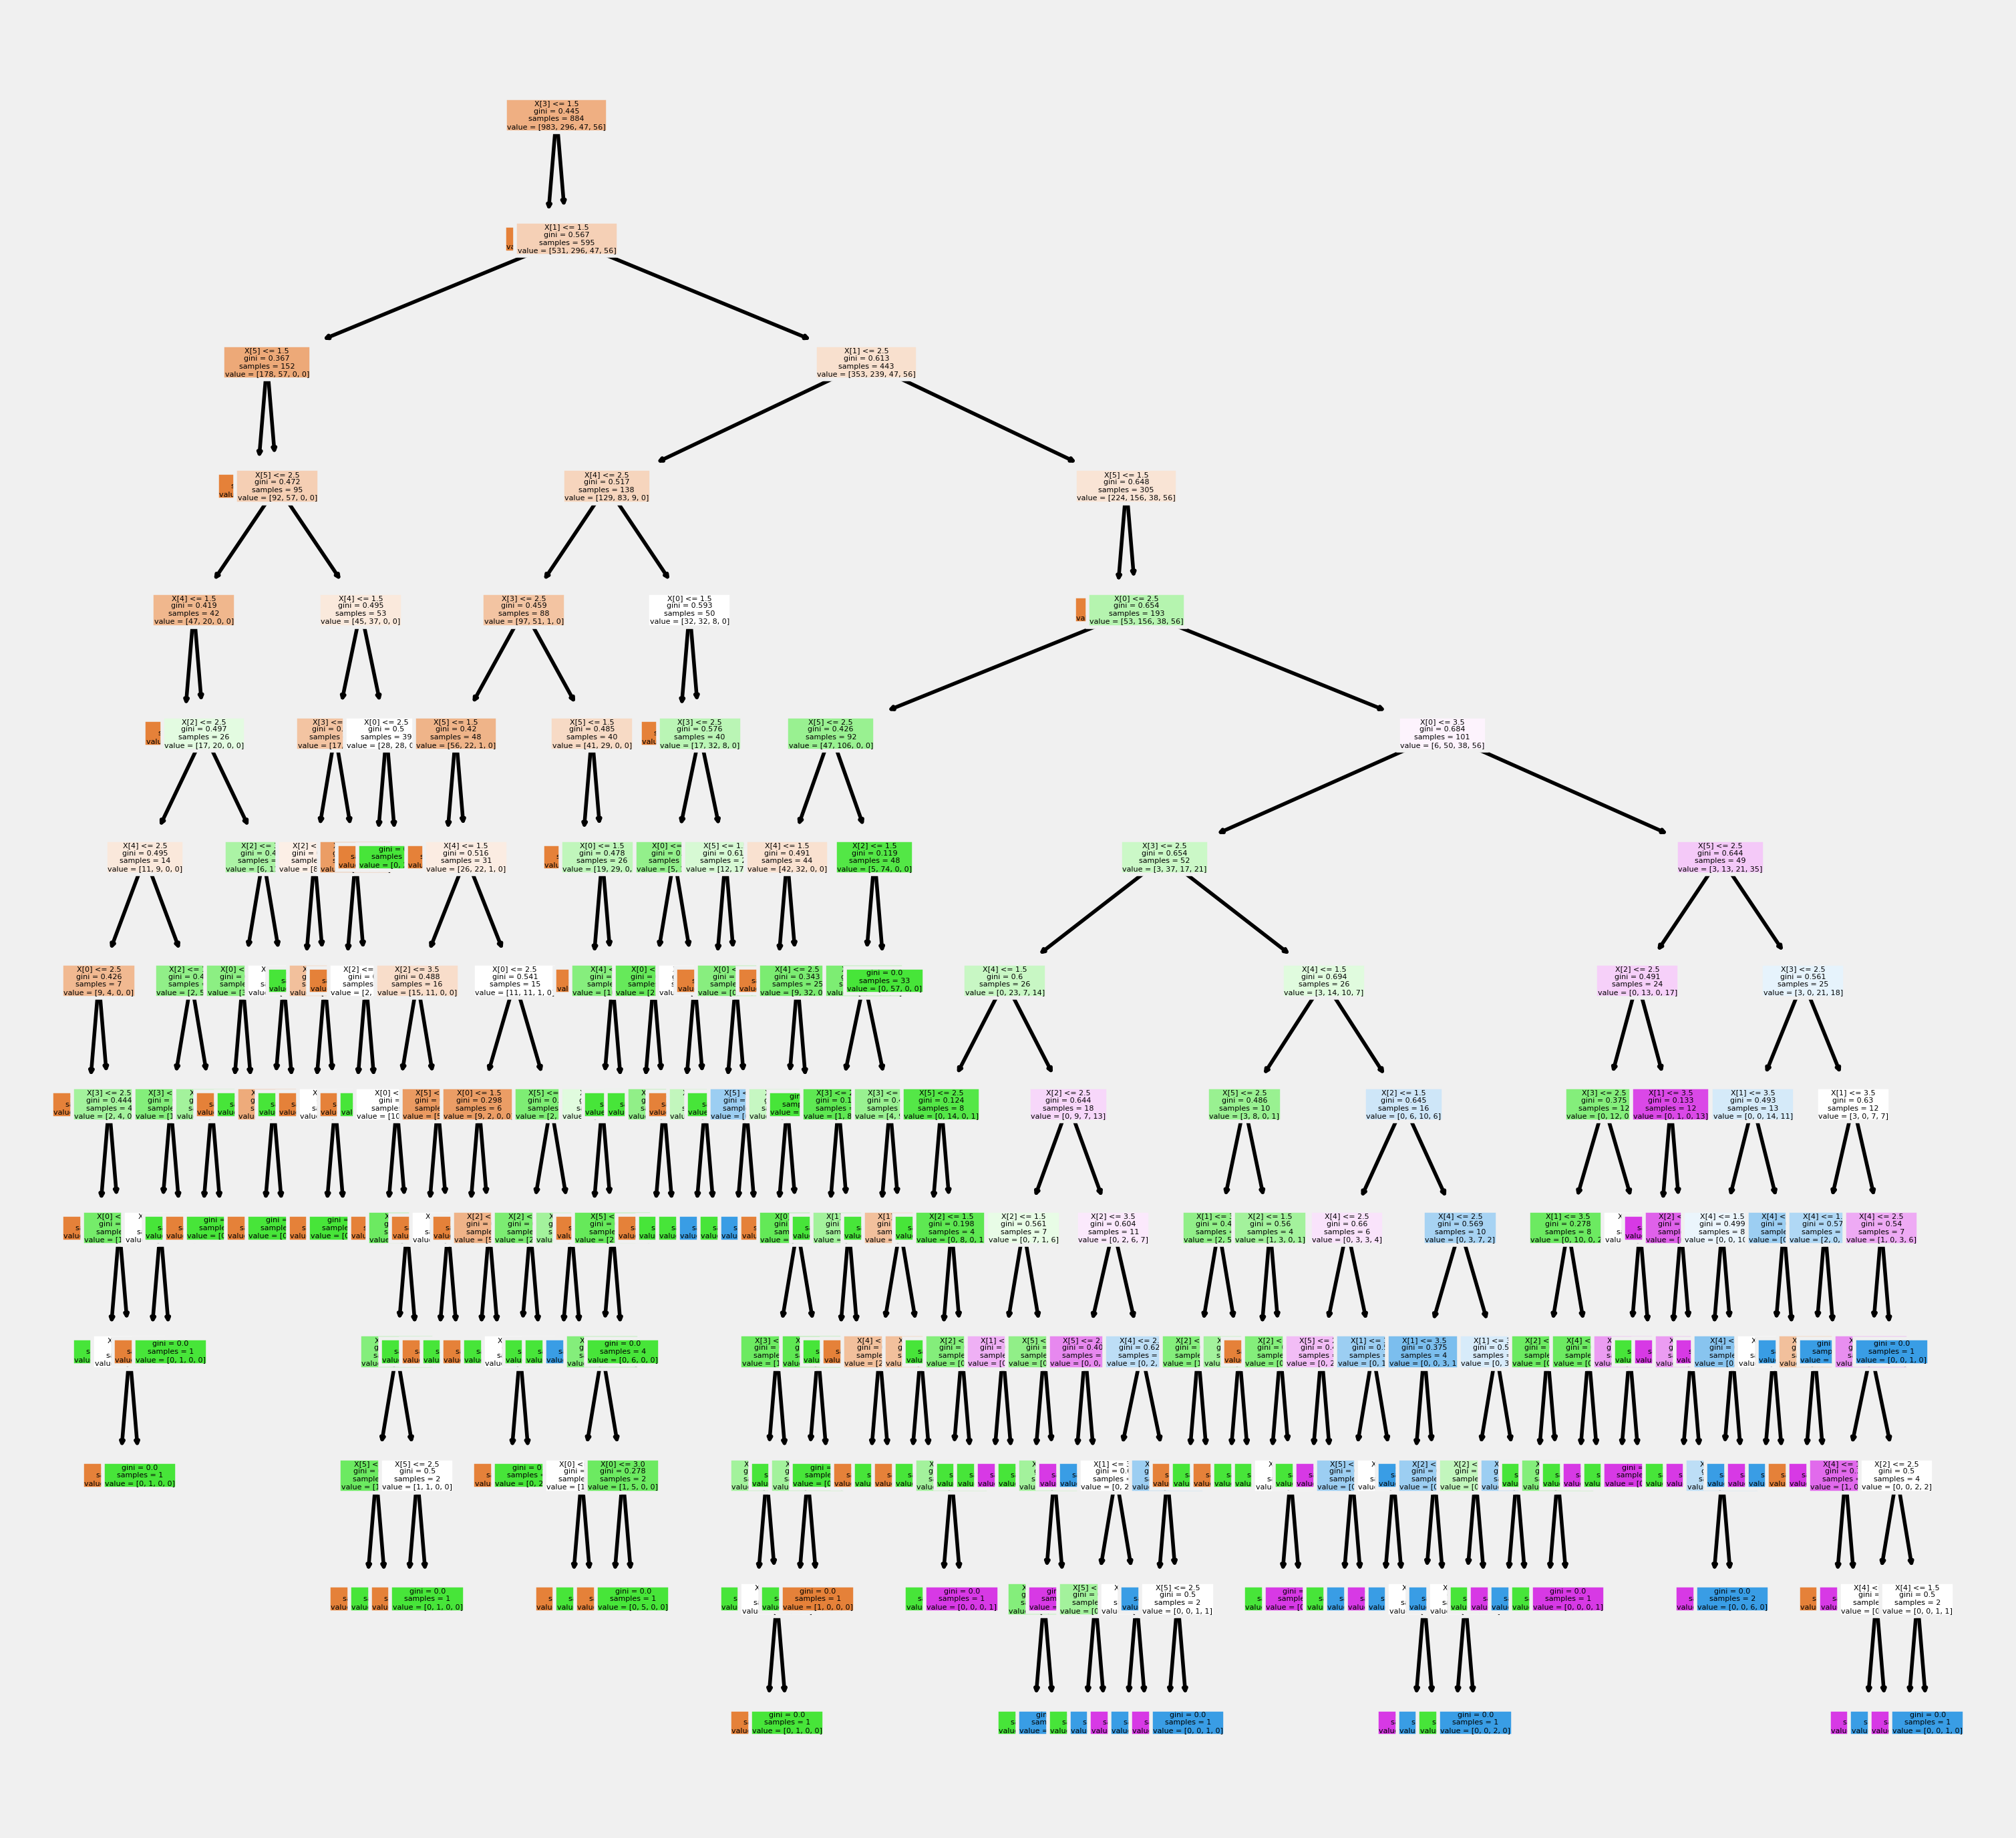

In [100]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               filled = True)
fig.savefig('rf_individualtree.png')

## Conclusie
De accuraatheid van de scores met decision tree is super accuraat. Met het veranderen van bijna geen waardes heb ik niet
super goede resultaten gekregen, hierdoor denk ik dat deze classifiers goed genoeg zijn voor de huidige dataset.
